In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import torch
import torch.nn as nn


import torch.optim as optim

import sys
sys.path.insert(0, '../libraries/')

import mnist_data_lib
import mnist_vae_lib
import common_utils

# Load data

In [2]:
train_set, test_set = mnist_data_lib.get_mnist_dataset(propn_sample=0.005)

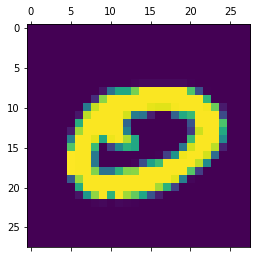

In [3]:
plt.matshow(train_set[0]['image'])

In [4]:
slen = train_set[0]['image'].shape[0]

# Get data loaders

In [5]:
batchsize = 20

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batchsize,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batchsize,
                shuffle=False)


In [6]:
for batch_idx, d in enumerate(train_loader):
    train_data = d
    break
    
for batch_idx, d in enumerate(test_loader):
    test_data = d
    break

# Define VAE

In [7]:
latent_dim = 5
n_classes = 10

In [8]:
vae = mnist_vae_lib.HandwritingVAE(latent_dim = latent_dim, 
                                    n_classes = n_classes)

In [9]:
# Load results

enc_file = "../mnist_vae_results_aws/mnist_vae_set_true_class_enc_epoch30"
dec_file = '../mnist_vae_results_aws/mnist_vae_set_true_class_dec_epoch30'

vae.encoder.load_state_dict(torch.load(enc_file,
                               map_location=lambda storage, loc: storage))

vae.decoder.load_state_dict(torch.load(dec_file,
                               map_location=lambda storage, loc: storage))

vae.eval()

HandwritingVAE(
  (encoder): MLPEncoder(
    (fc1): Linear(in_features=784, out_features=500, bias=True)
    (fc2): Linear(in_features=500, out_features=784, bias=True)
    (fc3): Linear(in_features=784, out_features=19, bias=True)
  )
  (decoder): MLPConditionalDecoder(
    (fc1): Linear(in_features=15, out_features=784, bias=True)
    (fc2): Linear(in_features=784, out_features=500, bias=True)
    (fc3): Linear(in_features=500, out_features=1568, bias=True)
  )
)

In [10]:
print(vae.parameters)

<bound method Module.parameters of HandwritingVAE(
  (encoder): MLPEncoder(
    (fc1): Linear(in_features=784, out_features=500, bias=True)
    (fc2): Linear(in_features=500, out_features=784, bias=True)
    (fc3): Linear(in_features=784, out_features=19, bias=True)
  )
  (decoder): MLPConditionalDecoder(
    (fc1): Linear(in_features=15, out_features=784, bias=True)
    (fc2): Linear(in_features=784, out_features=500, bias=True)
    (fc3): Linear(in_features=500, out_features=1568, bias=True)
  )
)>


In [11]:
num_images = train_loader.dataset.__len__()

In [12]:
vae.eval_vae(train_loader, set_true_class_label=True)

tensor(-1415.1733)

In [13]:
vae.eval_vae(test_loader, set_true_class_label=True)

tensor(-1362.5480)

In [14]:
# check a few train images

In [15]:
latent_means, latent_std, latent_samples, class_weights = \
    vae.encoder_forward(train_data['image'])

image_mu, image_std = vae.decoder_forward(latent_means, train_data['label'])

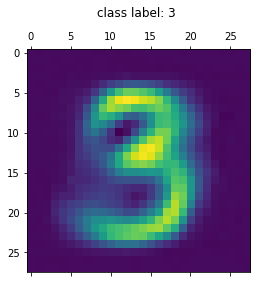

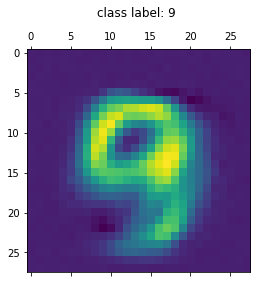

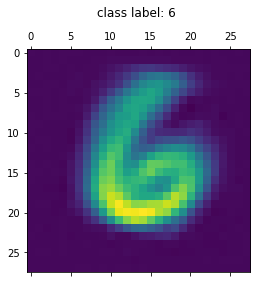

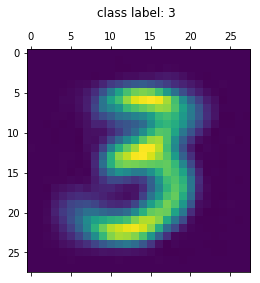

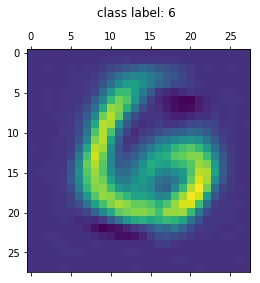

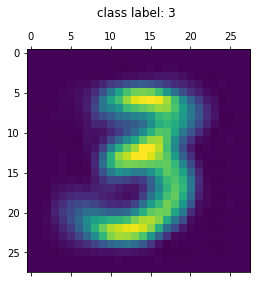

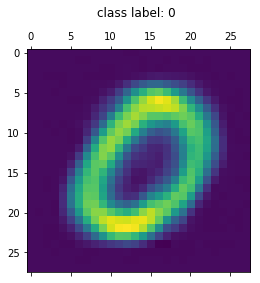

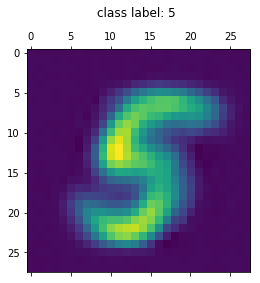

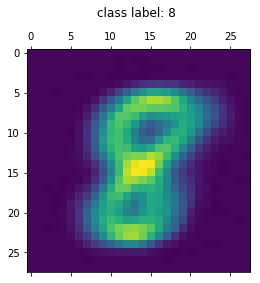

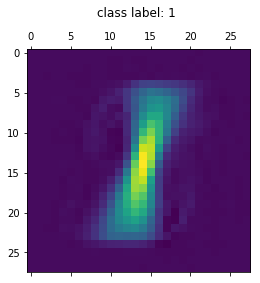

In [16]:
for i in range(10): 
    plt.matshow(image_mu[i, :, :].detach())
    plt.title('class label: {} \n'.format(train_data['label'][i]))

In [17]:
# check a few test images 

In [18]:
latent_means, latent_std, latent_samples, class_weights = \
    vae.encoder_forward(test_data['image'])

image_mu, image_std = vae.decoder_forward(latent_means, test_data['label'])

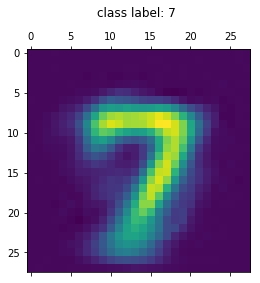

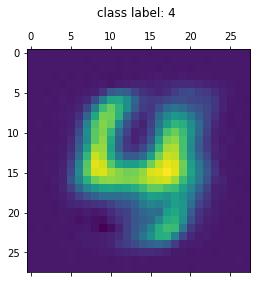

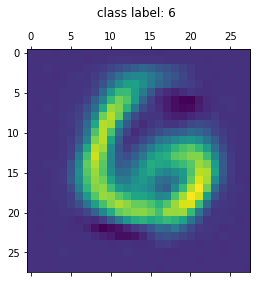

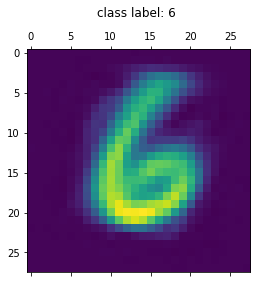

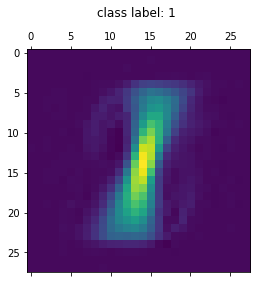

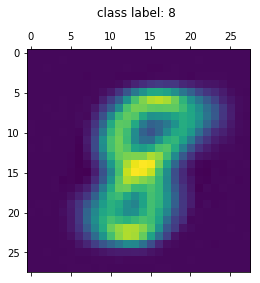

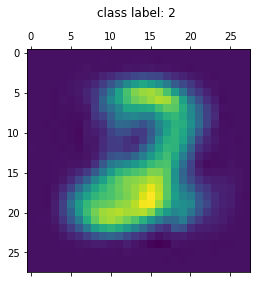

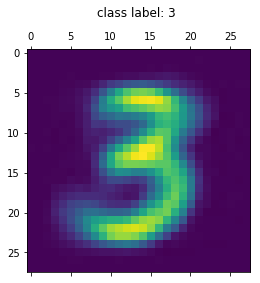

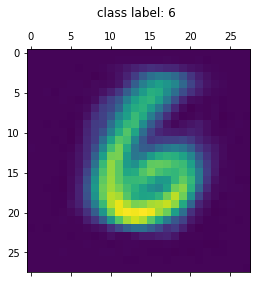

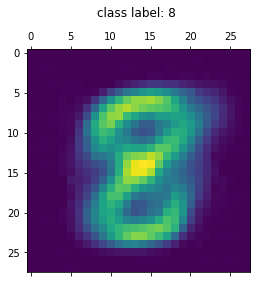

In [20]:
for i in range(10): 
    plt.matshow(image_mu[i, :, :].detach())
    plt.title('class label: {} \n'.format(test_data['label'][i]))